In [21]:
#Bir başka ceza uygulayarak hata karelerini azaltma
#metodudur.
#Değişken eleriz burda bazen, hepsi modele dahil olmayabilir.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV

In [5]:
hit= pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
ms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,ms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388047, tolerance: 3898.686956380658
  positive)


C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741439134, tolerance: 3898.686956380658
  positive)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679537535, tolerance: 3898.686956380658
  positive)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.75613726303, tolerance: 3898.686956380658
  positive)
C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

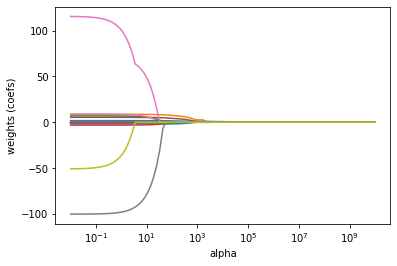

In [13]:
dummy_lasso =Lasso()
lambdalar=10**np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambdalar:
    dummy_lasso.set_params(alpha=i)
    dummy_lasso.fit(X_train,y_train)
    katsayilar.append(dummy_lasso.coef_)

ax=plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights (coefs)');

In [14]:
##Tuning starts

In [25]:
lasso_cv_model =LassoCV(alphas=None,
                       cv=10,
                       max_iter=10000,
                       normalize=True).fit(X_train,y_train)
#Hiç döngüye möngüye gerek yok, kendinden fonksiyonlu


lasso_cv_model.alpha_

0.39406126432470073

In [27]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

C:\Users\Samet Sökel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523974, tolerance: 3898.686956380658
  positive)


In [33]:
predicted=lasso_tuned.predict(X_test)


In [34]:
np.sqrt(mean_squared_error(predicted,y_test))

356.5226376958365